# <span class="bg-primary">17. DEV - MODELES DE SUPERVISION NON LINEAIRES</span>

# <span class="bg-info">TP QUALITE GUSTATIVE D'UN VIN selon physico-chimique</span>

In [22]:
# Chemin des sources
import os
os.chdir('C:/Users/PC Maison/7-OPENCLASSROOM/OC-COURS-17-MODELES_SUPERVISION_NON_LINEAIRES')

In [23]:
%pylab inline

# Chargement des librairies
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [24]:
# chargement des données
data = pd.read_csv('wine-white.csv', sep=';')

In [25]:
# créer la matrice de données
X = data[data.columns[:-1]].values
print(X.shape)

# créer le vecteur d'étiquettes
y = data['quality'].values
y = y.flatten()
print(y.shape)

(4898, 11)
(4898,)


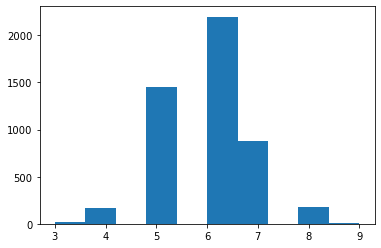

In [26]:
# étiquette y compris entre 3 et 9
plt.hist(y)
plt.show()

In [27]:
# transformer en un problème de classification binaire : séparer les vins avec
# y<6 mauvais vins classe 0 en vin >6 bons vins
y_class = np.where(y<6, 0, 1)
print('Mauvais vins, classe 0',y_class[y_class == 0].shape)
print('Bons vins, classe 1',y_class[y_class == 1].shape)

Mauvais vins, classe 0 (1640,)
Bons vins, classe 1 (3258,)


In [28]:
# séparation du jeu de données en train set et test set 30% test set
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y_class, test_size=0.3)

In [29]:
# standardiser les données
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)

# appliquer la transformation
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

# SVC Gamma=0.01

In [66]:
# Créer une SVMclassifier avec un noyau gaussien de paramètre gamma=0.01
from sklearn import svm
classifier = svm.SVC(C=1.0, kernel='rbf', gamma=0.01)

# Entraîner la SVM sur le jeu d'entraînement
classifier.fit(X_train_std, y_train)

SVC(gamma=0.01)

In [67]:
# Evalution
# prédire sur le jeu de test
y_test_pred = classifier.decision_function(X_test_std)

# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, y_test_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

In [68]:
print(auc)

0.7992466980819009


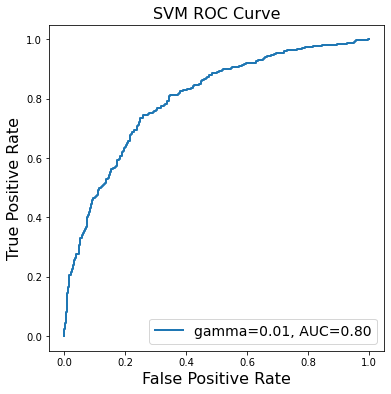

In [69]:
# Visualisation

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

In [70]:
# Matrice de Gram : matrice aec autant de lignes que de colonnes, que de 
# nombre d'observations dans le jeu d'entrainement
# Et chacune des entrées est simplement la valeur du noyu entre les 2 
# observations correspondantes
from sklearn import metrics
kmatrix = metrics.pairwise.rbf_kernel(X_train_std, gamma=0.01)

In [71]:
# Kmatrix sur les 100 premières lignes et 100 premières colonnes
kmatrix100 = kmatrix[:100, :100]

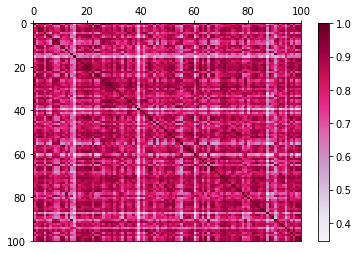

In [72]:
# dessiner la matrice
plt.pcolor(kmatrix100, cmap=matplotlib.cm.PuRd) 

# rajouter la légende
plt.colorbar()

# retourner l'axe des ordonnées
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()

# afficher l'image
plt.show()

# la diagonale est très forte des autres valeurs mais les autres valeurs
# ne sont pas trop éloignées de celle sur la diagonale

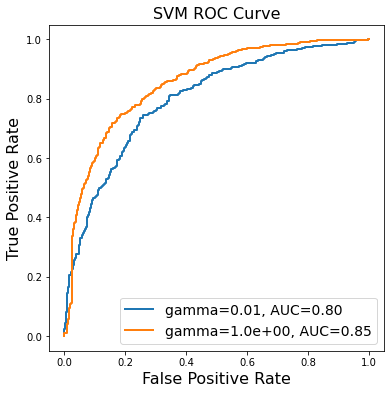

In [73]:
# prédire sur le jeu de test avec le modèle optimisé
y_test_pred_cv = grid.decision_function(X_test_std)

# construire la courbe ROC du modèle optimisé
fpr_cv, tpr_cv, thr_cv = metrics.roc_curve(y_test, y_test_pred_cv)

# calculer l'aire sous la courbe ROC du modèle optimisé
auc_cv = metrics.auc(fpr_cv, tpr_cv)

# créer une figure
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC précédente
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# afficher la courbe ROC du modèle optimisé
plt.plot(fpr_cv, tpr_cv, '-', lw=2, label='gamma=%.1e, AUC=%.2f' % \
         (grid.best_params_['gamma'], auc_cv))
         

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

# SVC, gamma=50

In [54]:
# avec une autre valeur de Gamma g2
g2=50

In [55]:
# Créer une SVMclassifier avec un noyau gaussien de paramètre gamma=0.01
from sklearn import svm
classifier = svm.SVC(C=1.0, kernel='rbf', gamma=g2)

# Entraîner la SVM sur le jeu d'entraînement
classifier.fit(X_train_std, y_train)

SVC(gamma=50)

In [63]:
# Evalution
# prédire sur le jeu de test
y_test_pred_50 = classifier.decision_function(X_test_std)

# construire la courbe ROC
from sklearn import metrics
fpr_50, tpr_50, thr_50 = metrics.roc_curve(y_test, y_test_pred_50)

# calculer l'aire sous la courbe ROC
auc_50 = metrics.auc(fpr_50, tpr_50)

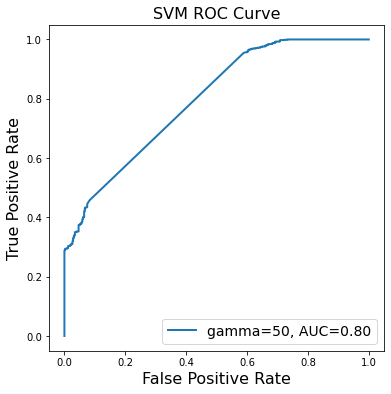

In [64]:
# Visualisation

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr_50, tpr_50, '-', lw=2, label='gamma=50, AUC=%.2f' % auc_50)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

# moins bons résultats

In [46]:
# Matrice de Gramm : matrice aec autant de lignes que de colonnes, que de 
# nombre d'observations dans le jeu d'entrainement
# Et chacune des entrées est simplement la valeur du noyu entre les 2 
# observations correspondantes
from sklearn import metrics
kmatrix = metrics.pairwise.rbf_kernel(X_train_std, gamma=g2)

In [47]:
# Kmatrix sur les 100 premières lignes et 100 premières colonnes
kmatrix100 = kmatrix[:100, :100]

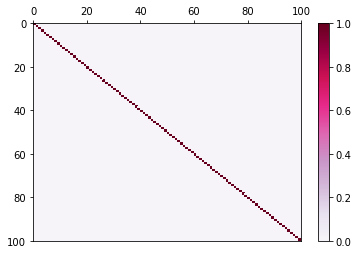

In [48]:
# dessiner la matrice
plt.pcolor(kmatrix100, cmap=matplotlib.cm.PuRd) 

# rajouter la légende
plt.colorbar()

# retourner l'axe des ordonnées
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()

# afficher l'image
plt.show()

# Cette matrice est à diagonale dominante, les valeurs sur la diagonale sont
# proches de 1 et les valeurs hors diagonales sont proches de 0
# ne permet pas de voir les ressemblance ==> modèle moins bon

# SVC, gamma trouvé par GridSearchCV

In [50]:
# choisir 6 valeurs pour C, entre 1e-2 et 1e3
C_range = np.logspace(-2, 3, 6)

# choisir 4 valeurs pour gamma, entre 1e-2 et 10
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'C': C_range, 'gamma': gamma_range}

# critère de sélection du meilleur modèle
score = 'roc_auc'

# initialiser une recherche sur grille
grid = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), 
                                    param_grid, 
                                    cv=5, # 5 folds de validation croisée  
                                    scoring=score)

# faire tourner la recherche sur grille
grid.fit(X_train_std, y_train)

# afficher les paramètres optimaux
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_, grid.best_score_))

The optimal parameters are {'C': 1.0, 'gamma': 1.0} with a score of 0.85


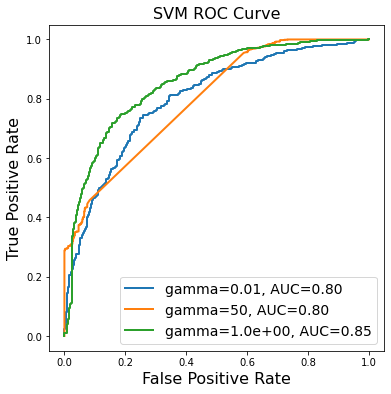

In [74]:
# prédire sur le jeu de test avec le modèle optimisé
y_test_pred_cv = grid.decision_function(X_test_std)

# construire la courbe ROC du modèle optimisé
fpr_cv, tpr_cv, thr_cv = metrics.roc_curve(y_test, y_test_pred_cv)

# calculer l'aire sous la courbe ROC du modèle optimisé
auc_cv = metrics.auc(fpr_cv, tpr_cv)

# créer une figure
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC précédente gamma=0.01
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# afficher la courbe ROC précédente gamma=50
plt.plot(fpr_50, tpr_50, '-', lw=2, label='gamma=50, AUC=%.2f' % auc_50)

# afficher la courbe ROC du modèle optimisé
plt.plot(fpr_cv, tpr_cv, '-', lw=2, label='gamma=%.1e, AUC=%.2f' % \
         (grid.best_params_['gamma'], auc_cv))
         

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

# <span class="bg-info">REGRESSION RIDGE A NOYAU : KernelRidge()</span>

In [76]:
# charger les données
import pandas as pd
data = pd.read_csv('wine-white.csv', sep=';')

# créer la matrice de données
X = data[data.columns[:-1]].values

# créer le vecteur d'étiquettes
y = data['quality'].values

# créer un jeu d'entrainement et un jeu de test (30% des données)
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.3)
                                
# standardiser les données
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)                               

# RidgeKernel, gamma=0.01

In [77]:
# Nous pouvons maintenant entraîner une kRR sur le jeu d'entraînement en
# utilisant des paramètres par défaut pour le paramètre de régularisation et 
# la bande passante du noyau RBF gaussien
from sklearn import kernel_ridge
predicteur = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=0.01)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train_std, y_train)

# prédire sur le jeu de test
y_test_pred = predicteur.predict(X_test_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 0.73


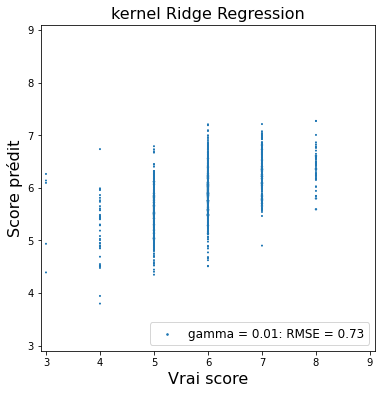

In [80]:
# Visualisation des résultats
# créer une figure
fig = plt.figure(figsize=(6, 6))

# Compter, pour chaque paire de valeurs (y, y') où y est un vrai score et y' le score prédit,
# le nombre de ces paires.
# Ce nombre sera utilisé pour modifier la taille des marqueurs correspondants 
# dans un nuage de points
sizes = {}
for (yt, yp) in zip(list(y_test), list(y_test_pred)):
    if (yt, yp) in sizes.keys():
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1        
keys = sizes.keys()

# afficher les prédictions
plt.scatter([k[0] for k in keys], 
            [k[1] for k in keys], 
             s=[sizes[k] for k in keys], 
            label="gamma = 0.01: RMSE = {:.2f}".format(rmse))

# étiqueter les axes et le graphique
plt.xlabel('Vrai score', fontsize=16)
plt.ylabel(u'Score prédit', fontsize=16)
plt.title('kernel Ridge Regression', fontsize=16)

# limites des axes
plt.xlim([2.9, 9.1])
plt.ylim([2.9, 9.1])

# afficher la légende
plt.legend(loc="lower right", fontsize=12)
plt.show()

# RidgeKernel, gamma=50

In [83]:
# Nous pouvons maintenant entraîner une kRR sur le jeu d'entraînement en
# utilisant des paramètres par défaut pour le paramètre de régularisation et 
# la bande passante du noyau RBF gaussien
from sklearn import kernel_ridge
predicteur = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=50)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train_std, y_train)

# prédire sur le jeu de test
y_test_pred2 = predicteur.predict(X_test_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse2 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred2))
print("RMSE: {:.2f}".format(rmse2))

RMSE: 5.26


dict_keys([])


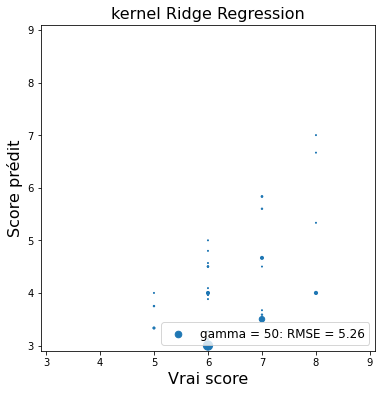

In [86]:
# Visualisation des résultats
# créer une figure
fig = plt.figure(figsize=(6, 6))

# Compter, pour chaque paire de valeurs (y, y') où y est un vrai score et y' le score prédit,
# le nombre de ces paires.
# Ce nombre sera utilisé pour modifier la taille des marqueurs correspondants 
# dans un nuage de points

sizes_2 = {}
for (yt_2, yp_2) in zip(list(y_test), list(y_test_pred2)):
    if (yt_2, yp_2) in sizes_2.keys():
        sizes_2[(yt_2, yp_2)] += 1
    else:
        sizes_2[(yt_2, yp_2)] = 1        
keys_2 = sizes_2.keys()

# afficher les prédictions
plt.scatter([k[0] for k in keys_2], 
            [k[1] for k in keys_2], 
             s=[sizes_2[k] for k in keys_2], 
            label="gamma = 50: RMSE = {:.2f}".format(rmse2))

# étiqueter les axes et le graphique
plt.xlabel('Vrai score', fontsize=16)
plt.ylabel(u'Score prédit', fontsize=16)
plt.title('kernel Ridge Regression', fontsize=16)

# limites des axes
plt.xlim([2.9, 9.1])
plt.ylim([2.9, 9.1])

# afficher la légende
plt.legend(loc="lower right", fontsize=12)
plt.show()

# RidgeKernel, GridSearchCV

In [87]:
# Pour optimiser le paramètre de régularisation alpha et le paramètre gamma du
# noyau gaussien, on peut utiliser une recherche sur grille 
# valeurs du paramètre C
alpha_range = np.logspace(-2, 2, 5)

# valeurs du paramètre gamma
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'alpha': alpha_range, 'gamma': gamma_range}

# score pour sélectionner le modèle optimal
score = 'neg_mean_squared_error'

# initialiser la validation croisée
grid_pred = model_selection.GridSearchCV(
        kernel_ridge.KernelRidge(kernel='rbf'),
        param_grid,
        cv=5,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred.fit(X_train_std, y_train)

# prédire sur le jeu de test avec le modèle sélectionné 
y_test_pred_cv = grid_pred.predict(X_test_std)

# calculer la RMSE correspondante
rmse_cv = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_cv))

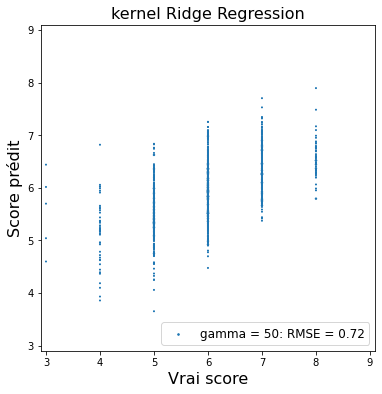

In [88]:
# Visualisation des résultats
# créer une figure
fig = plt.figure(figsize=(6, 6))

# Compter, pour chaque paire de valeurs (y, y') où y est un vrai score et y' le score prédit,
# le nombre de ces paires.
# Ce nombre sera utilisé pour modifier la taille des marqueurs correspondants 
# dans un nuage de points

sizes_cv = {}
for (yt_cv, yp_cv) in zip(list(y_test), list(y_test_pred_cv)):
    if (yt_cv, yp_cv) in sizes_cv.keys():
        sizes_cv[(yt_cv, yp_cv)] += 1
    else:
        sizes_cv[(yt_cv, yp_cv)] = 1        
keys_cv = sizes_cv.keys()

# afficher les prédictions
plt.scatter([k[0] for k in keys_cv], 
            [k[1] for k in keys_cv], 
             s=[sizes_cv[k] for k in keys_cv], 
            label="gamma = 50: RMSE = {:.2f}".format(rmse_cv))

# étiqueter les axes et le graphique
plt.xlabel('Vrai score', fontsize=16)
plt.ylabel(u'Score prédit', fontsize=16)
plt.title('kernel Ridge Regression', fontsize=16)

# limites des axes
plt.xlim([2.9, 9.1])
plt.ylim([2.9, 9.1])

# afficher la légende
plt.legend(loc="lower right", fontsize=12)
plt.show()

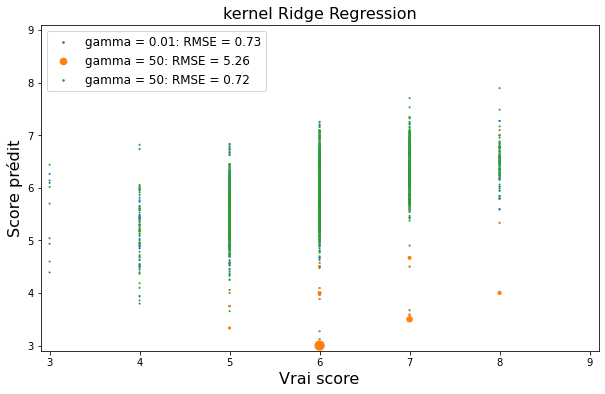

In [92]:
# tout sur le même graphique
# créer une figure
fig = plt.figure(figsize=(10, 6))

# afficher les prédictions
plt.scatter([k[0] for k in keys], 
            [k[1] for k in keys], 
             s=[sizes[k] for k in keys], 
            label="gamma = 0.01: RMSE = {:.2f}".format(rmse))

# afficher les prédictions
plt.scatter([k[0] for k in keys_2], 
            [k[1] for k in keys_2], 
             s=[sizes_2[k] for k in keys_2], 
            label="gamma = 50: RMSE = {:.2f}".format(rmse2))

# afficher les prédictions
plt.scatter([k[0] for k in keys_cv], 
            [k[1] for k in keys_cv], 
             s=[sizes_cv[k] for k in keys_cv], 
            label="gamma = 50: RMSE = {:.2f}".format(rmse_cv))

# étiqueter les axes et le graphique
plt.xlabel('Vrai score', fontsize=16)
plt.ylabel(u'Score prédit', fontsize=16)
plt.title('kernel Ridge Regression', fontsize=16)

# limites des axes
plt.xlim([2.9, 9.1])
plt.ylim([2.9, 9.1])

# afficher la légende
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [ ]:
# <span class="bg-info"></span>